In [ ]:
from astropy.io import fits 
from astropy.visualization import ZScaleInterval
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

from regions import CircleSkyRegion, CirclePixelRegion,PixCoord
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt 
from matplotlib import rc

import numpy as np 
import pandas as pd 

rc('font',**{'family':'serif','serif':['Times']})

def plot(x,y):
    w = 30
    xx = int(x)
    yy = int(y)
    vmin,vmax = ZScaleInterval().get_limits(img[int(x)-w:int(x)+w,int(y)-w:int(y)+w])
    cmap = 'bone'
    region_pix = CirclePixelRegion(center=PixCoord(x=x, y=y),
                               radius=12)
    f,ax=plt.subplots(1,1,figsize=(5,5))
    im = plt.imshow(img,vmin=vmin,vmax=vmax,cmap=cmap)
    plt.scatter(x,y,c='r')
    plt.xlim(x-w,x+w)
    plt.ylim(y-w,y+w)
    plt.xticks([])
    plt.yticks([])
    region_pix.plot(color='r',lw=3, ls='dashed')
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cticks = np.arange(.1e-3, .9e-3,.1e-3)
    clb = plt.colorbar(im,cax=cax,ticks=cticks)
    clb.ax.set_title(r'milli-counts s$^{-1}$',loc='center')
    #clb.ax.set_yticklabels(['1x10$^{-4}$','2x10$^{-4}$','3x10$^{-4}$','4x10$^{-4}$','5x10$^{-4}$','6x10$^{-4}$','7x10$^{-4}$','8x10$^{-4}$'])
    clb.ax.set_yticklabels(['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8'])
    plt.tight_layout()
    plt.savefig('masked_region.png')

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 55793.968785 from DATE-OBS.
Set MJD-END to 55793.970116 from DATE-END'. [astropy.wcs.wcs]


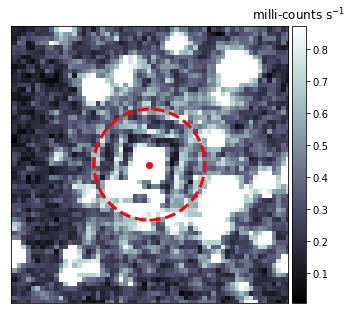

In [ ]:
path = 'SUMS_Tractor_Data/smc/smc_4044X/sw00040440001uw1_sk_40440_1_3/'
img_file = path + '40440_uw1_1_3_img.fits'
hdr = fits.open(img_file)[0].header
exp = hdr['EXPOSURE']
img = fits.open(img_file)[0].data / exp

wcs = WCS(hdr)

df = pd.read_csv(path + 'masked_catalog_00040440001_UVW1.csv')
r = df.iloc[18]

ra = r.ra
dec = r.dec
x,y = SkyCoord(ra,dec,unit='deg').to_pixel(wcs)
plot(x,y)



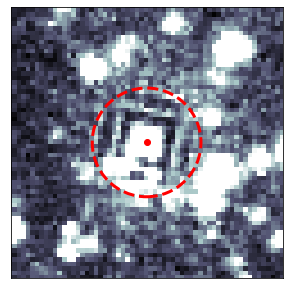

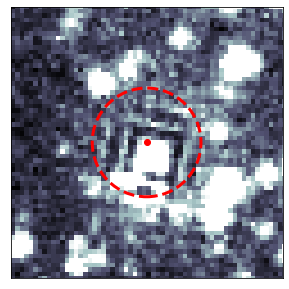

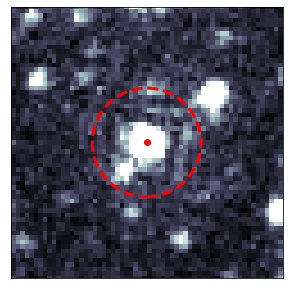

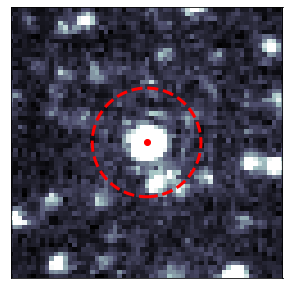

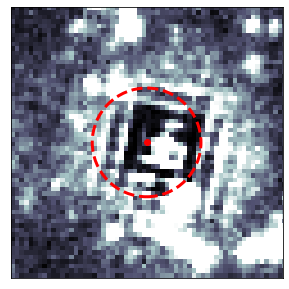

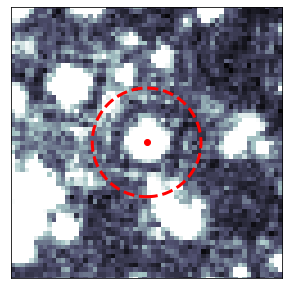

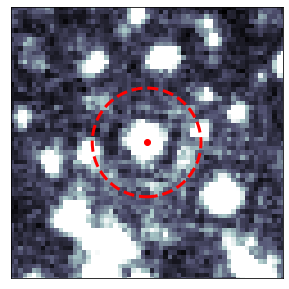

In [65]:
for i,r in df[18:25].iterrows():
    ra = r.ra
    dec = r.dec
    x,y = SkyCoord(ra,dec,unit='deg').to_pixel(wcs)
    plot(x,y)